In [ ]:
# Daejeon, June 2018
# Behavior Based Customer Segmentation using E-commerce
# Data from http://archive.ics.uci.edu/ml/datasets/online+retail#

In [4]:
setwd("D:/R Online Course/code on the spot")
#install.packages("dplyr", dependencies=TRUE, repos="http://cran.us.r-project.org")
library(dplyr)
#readxl::read_excel("Online Retail.xlsx")
data <- readxl::read_excel("Online Retail.xlsx")
str(data)

Warning message:
"package 'dplyr' was built under R version 3.3.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Classes 'tbl_df', 'tbl' and 'data.frame':	541909 obs. of  8 variables:
 $ InvoiceNo  : chr  "536365" "536365" "536365" "536365" ...
 $ StockCode  : chr  "85123A" "71053" "84406B" "84029G" ...
 $ Description: chr  "WHITE HANGING HEART T-LIGHT HOLDER" "WHITE METAL LANTERN" "CREAM CUPID HEARTS COAT HANGER" "KNITTED UNION FLAG HOT WATER BOTTLE" ...
 $ Quantity   : num  6 6 8 6 6 2 6 6 6 32 ...
 $ InvoiceDate: POSIXct, format: "2010-12-01 08:26:00" "2010-12-01 08:26:00" ...
 $ UnitPrice  : num  2.55 3.39 2.75 3.39 3.39 7.65 4.25 1.85 1.85 1.69 ...
 $ CustomerID : num  17850 17850 17850 17850 17850 ...
 $ Country    : chr  "United Kingdom" "United Kingdom" "United Kingdom" "United Kingdom" ...


In [5]:
head(data, 10)
summary(data)

InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom
536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom
536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom
536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850,United Kingdom
536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047,United Kingdom


  InvoiceNo          StockCode         Description           Quantity        
 Length:541909      Length:541909      Length:541909      Min.   :-80995.00  
 Class :character   Class :character   Class :character   1st Qu.:     1.00  
 Mode  :character   Mode  :character   Mode  :character   Median :     3.00  
                                                          Mean   :     9.55  
                                                          3rd Qu.:    10.00  
                                                          Max.   : 80995.00  
                                                                             
  InvoiceDate                    UnitPrice           CustomerID    
 Min.   :2010-12-01 08:26:00   Min.   :-11062.06   Min.   :12346   
 1st Qu.:2011-03-28 11:34:00   1st Qu.:     1.25   1st Qu.:13953   
 Median :2011-07-19 17:17:00   Median :     2.08   Median :15152   
 Mean   :2011-07-04 13:34:57   Mean   :     4.61   Mean   :15288   
 3rd Qu.:2011-10-19 11:27:00   3rd Q

In [6]:
# The data contains:
# InvoiceNo, StockCode, Description, Quantity,
# InvoiceData, UnitPrice, CustomerID, Country
# Dalam customer behavior segmentation kita butuh tiga aspek yaitu:
# a. recency: how recently did customer purchase?
# b. frequency: how often did our customer purchase our porducts?
# c. monetary: how is the total amount the customer has purchased?

In [6]:
# WRANGLING DATA:
# 2.1. Select appropriate variables
dataset <- data[c("InvoiceNo", "StockCode", "Quantity", "UnitPrice", "InvoiceDate", "CustomerID", "Description", "Country")]
# 2.2 Delete Quantity and Unit Price < 0
dataset %>% filter(Quantity > 0 & UnitPrice > 0)
# 2.3 Create Amount Variable
dataset["Amount"] <- dataset["Quantity"] * dataset["UnitPrice"]
head(dataset, 3)

Warning message:
"package 'bindrcpp' was built under R version 3.3.3"

InvoiceNo,StockCode,Quantity,UnitPrice,InvoiceDate,CustomerID,Description,Country
536365,85123A,6,2.55,2010-12-01 08:26:00,17850,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
536365,71053,6,3.39,2010-12-01 08:26:00,17850,WHITE METAL LANTERN,United Kingdom
536365,84406B,8,2.75,2010-12-01 08:26:00,17850,CREAM CUPID HEARTS COAT HANGER,United Kingdom
536365,84029G,6,3.39,2010-12-01 08:26:00,17850,KNITTED UNION FLAG HOT WATER BOTTLE,United Kingdom
536365,84029E,6,3.39,2010-12-01 08:26:00,17850,RED WOOLLY HOTTIE WHITE HEART.,United Kingdom
536365,22752,2,7.65,2010-12-01 08:26:00,17850,SET 7 BABUSHKA NESTING BOXES,United Kingdom
536365,21730,6,4.25,2010-12-01 08:26:00,17850,GLASS STAR FROSTED T-LIGHT HOLDER,United Kingdom
536366,22633,6,1.85,2010-12-01 08:28:00,17850,HAND WARMER UNION JACK,United Kingdom
536366,22632,6,1.85,2010-12-01 08:28:00,17850,HAND WARMER RED POLKA DOT,United Kingdom
536367,84879,32,1.69,2010-12-01 08:34:00,13047,ASSORTED COLOUR BIRD ORNAMENT,United Kingdom


InvoiceNo,StockCode,Quantity,UnitPrice,InvoiceDate,CustomerID,Description,Country,Amount
536365,85123A,6,2.55,2010-12-01 08:26:00,17850,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom,15.30
536365,71053,6,3.39,2010-12-01 08:26:00,17850,WHITE METAL LANTERN,United Kingdom,20.34
536365,84406B,8,2.75,2010-12-01 08:26:00,17850,CREAM CUPID HEARTS COAT HANGER,United Kingdom,22.00


In [7]:
#x11()
#boxplot(data$Quantity~data$UnitPrice, data = data, main="Quantity",
        #xlab="Unit Price", ylab="Quantity")

In [8]:
# 2.4 Split InvoiceDate into Date and Time
dataset["Date"] <- format(as.POSIXct(strptime(dataset$InvoiceDate, "%Y-%m-%d %H:%M", tz="")), format="%Y-%m-%d")
dataset["Time"]  <- format(as.POSIXct(strptime(dataset$InvoiceDate, "%Y-%m-%d %H:%M", tz="")), format="%H:%M")

In [9]:
# 2.5 Contry == United Kingdom
dataset %>% filter(Country == "United Kingdom")
head(dataset, 3)

InvoiceNo,StockCode,Quantity,UnitPrice,InvoiceDate,CustomerID,Description,Country,Amount,Date,Time
536365,85123A,6,2.55,2010-12-01 08:26:00,17850,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom,15.30,2010-12-01,08:26
536365,71053,6,3.39,2010-12-01 08:26:00,17850,WHITE METAL LANTERN,United Kingdom,20.34,2010-12-01,08:26
536365,84406B,8,2.75,2010-12-01 08:26:00,17850,CREAM CUPID HEARTS COAT HANGER,United Kingdom,22.00,2010-12-01,08:26
536365,84029G,6,3.39,2010-12-01 08:26:00,17850,KNITTED UNION FLAG HOT WATER BOTTLE,United Kingdom,20.34,2010-12-01,08:26
536365,84029E,6,3.39,2010-12-01 08:26:00,17850,RED WOOLLY HOTTIE WHITE HEART.,United Kingdom,20.34,2010-12-01,08:26
536365,22752,2,7.65,2010-12-01 08:26:00,17850,SET 7 BABUSHKA NESTING BOXES,United Kingdom,15.30,2010-12-01,08:26
536365,21730,6,4.25,2010-12-01 08:26:00,17850,GLASS STAR FROSTED T-LIGHT HOLDER,United Kingdom,25.50,2010-12-01,08:26
536366,22633,6,1.85,2010-12-01 08:28:00,17850,HAND WARMER UNION JACK,United Kingdom,11.10,2010-12-01,08:28
536366,22632,6,1.85,2010-12-01 08:28:00,17850,HAND WARMER RED POLKA DOT,United Kingdom,11.10,2010-12-01,08:28
536367,84879,32,1.69,2010-12-01 08:34:00,13047,ASSORTED COLOUR BIRD ORNAMENT,United Kingdom,54.08,2010-12-01,08:34


InvoiceNo,StockCode,Quantity,UnitPrice,InvoiceDate,CustomerID,Description,Country,Amount,Date,Time
536365,85123A,6,2.55,2010-12-01 08:26:00,17850,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom,15.30,2010-12-01,08:26
536365,71053,6,3.39,2010-12-01 08:26:00,17850,WHITE METAL LANTERN,United Kingdom,20.34,2010-12-01,08:26
536365,84406B,8,2.75,2010-12-01 08:26:00,17850,CREAM CUPID HEARTS COAT HANGER,United Kingdom,22.00,2010-12-01,08:26


In [10]:
#2.6 Drop the rows those CustomerID NA
dataset <- dataset[complete.cases(dataset),]

In [11]:
#Create RFM Variables
# 2.7 Create New Dataset
#?arrange
#?summarise
df_1 <- dataset %>% arrange(CustomerID) %>% group_by(InvoiceNo) %>% summarise(TotalAmount = sum(Amount))
head(df_1, 5)
df_2 <- dataset[c("InvoiceNo", "CustomerID", "Date", "Time")]
head(df_2, 5)
total <- merge(df_1, df_2, by="InvoiceNo")
head(total, 5)
total <- total[!duplicated(total),]
head(total, 5)
rownames(total) <- 1:nrow(total)

total %>% arrange(CustomerID)
total$CustomerID <- as.factor(total$CustomerID)

Monetary <- total %>% group_by(CustomerID) %>% summarise(Monetary = mean(TotalAmount))
head(Monetary, 5)
Frequency <- total %>% group_by(CustomerID) %>% summarise(Frequency = n())
head(Frequency, 5)

total$TimeDiff <- round((as.numeric(difftime(strptime('2011-12-09', format = "%Y-%m-%d", tz = ""),
                                            strptime(total$Date, format = "%Y-%m-%d", tz = "")))/(60*60*24*30)),1)
head(total, 3)

Recency <- total %>% group_by(CustomerID) %>% summarise(Recency = max(TimeDiff))
# we already have Monetary, Recency, and Frequency data
RFM_data <- merge(merge(Recency, Frequency, by='CustomerID'), Monetary, by='CustomerID')
head(RFM_data, 3)
summary(RFM_data)


InvoiceNo,TotalAmount
536365,139.12
536366,22.20
536367,278.73
536368,70.05
536369,17.85


InvoiceNo,CustomerID,Date,Time
536365,17850,2010-12-01,08:26
536365,17850,2010-12-01,08:26
536365,17850,2010-12-01,08:26
536365,17850,2010-12-01,08:26
536365,17850,2010-12-01,08:26


InvoiceNo,TotalAmount,CustomerID,Date,Time
536365,139.12,17850,2010-12-01,08:26
536365,139.12,17850,2010-12-01,08:26
536365,139.12,17850,2010-12-01,08:26
536365,139.12,17850,2010-12-01,08:26
536365,139.12,17850,2010-12-01,08:26


,InvoiceNo,TotalAmount,CustomerID,Date,Time
1,536365,139.12,17850,2010-12-01,08:26
8,536366,22.20,17850,2010-12-01,08:28
10,536367,278.73,13047,2010-12-01,08:34
22,536368,70.05,13047,2010-12-01,08:34
26,536369,17.85,13047,2010-12-01,08:35


InvoiceNo,TotalAmount,CustomerID,Date,Time
541431,77183.60,12346,2011-01-18,10:01
C541433,-77183.60,12346,2011-01-18,10:17
537626,711.79,12347,2010-12-07,14:57
542237,475.39,12347,2011-01-26,14:30
549222,636.25,12347,2011-04-07,10:43
556201,382.52,12347,2011-06-09,13:01
562032,584.91,12347,2011-08-02,08:48
573511,1294.32,12347,2011-10-31,12:25
581180,224.82,12347,2011-12-07,15:52
539318,892.80,12348,2010-12-16,19:09


CustomerID,Monetary
12346,0.0000
12347,615.7143
12348,449.3100
12349,1757.5500
12350,334.4000


CustomerID,Frequency
12346,2
12347,7
12348,4
12349,1
12350,1


InvoiceNo,TotalAmount,CustomerID,Date,Time,TimeDiff
536365,139.12,17850,2010-12-01,08:26,12.4
536366,22.20,17850,2010-12-01,08:28,12.4
536367,278.73,13047,2010-12-01,08:34,12.4


CustomerID,Recency,Frequency,Monetary
12346,10.8,2,0.0000
12347,12.2,7,615.7143
12348,11.9,4,449.3100


   CustomerID      Recency        Frequency          Monetary      
 12346  :   1   Min.   : 0.00   Min.   :  1.000   Min.   :-4287.6  
 12347  :   1   1st Qu.: 3.80   1st Qu.:  1.000   1st Qu.:  152.0  
 12348  :   1   Median : 8.40   Median :  3.000   Median :  237.0  
 12349  :   1   Mean   : 7.51   Mean   :  5.083   Mean   :  316.0  
 12350  :   1   3rd Qu.:11.00   3rd Qu.:  5.000   3rd Qu.:  370.9  
 12352  :   1   Max.   :12.40   Max.   :249.000   Max.   : 6207.7  
 (Other):4366                                                      

[1]  6207.6700000  5383.9750000  4873.8100000  4758.6711538  4366.7800000
   [6]  4314.7200000  4136.1046774  4131.2333333  4008.6200000  3914.9450000
  [11]  3861.0000000  3629.7275325  3601.1064286  3408.7667273  3287.1266667
  [16]  3096.0000000  2661.2400000  2398.1920000  2325.6800000  2249.6000000
  [21]  2125.5509677  2062.0600000  2044.3700000  2033.1000000  2020.5200000
  [26]  2007.4000000  2002.4000000  1946.0029787  1911.2736364  1910.8385714
  [31]  1862.0000000  1837.9200000  1829.0400000  1787.0248276  1784.7100000
  [36]  1780.5900000  1764.7200000  1757.5500000  1717.9415152  1710.3900000
  [41]  1708.2400000  1706.8800000  1693.8800000  1683.3788889  1680.0267647
  [46]  1673.1405000  1654.4125000  1635.6600000  1596.2700000  1588.1314286
  [51]  1579.5614286  1571.9425000  1533.7828571  1488.9200000  1487.6000000
  [56]  1482.9185714  1474.8750000  1457.4455556  1453.4250000  1447.7250000
  [61]  1432.0000000  1395.7950000  1393.0600000  1384.2500000  1352.9430769
  [66]  1351.4500000  1342.3864286  1331.6419048  1326.4575000  1316.9490909
  [71]  1308.4800000  1304.0400000  1300.7750000  1288.7766667  1281.5300000
  [76]  1265.0080000  1246.3200000  1221.8733333  1210.3090909  1204.9500000
  [81]  1201.4900000  1193.3200000  1178.9400000  1171.4611111  1170.9713043
  [86]  1163.0980000  1152.0000000  1144.0650000  1143.6000000  1141.2400000
  [91]  1130.2764444  1121.0050000  1109.5300000  1109.0100000  1104.9250000
  [96]  1104.0833333  1099.6550000  1098.7800000  1093.5833333  1092.1115385
 [101]  1089.1800000  1082.0303333  1079.4000000  1077.7400000  1071.0300000
 [106]  1070.5336000  1070.4800000  1063.0000000  1055.4666667  1049.1525000
 [111]  1048.8500000  1044.8400000  1044.2183333  1043.1000000  1040.9216667
 [116]  1040.7020000  1037.3200000  1035.4500000  1033.3400000  1028.5600000
 [121]  1021.7480000  1017.6800000  1016.8225000  1016.6266667  1014.4392308
 [126]  1013.0100000  1012.2250000  1011.8640000  1003.7200000  1002.3100000
 [131]  1001.9250000  1001.0920000   999.0000000   998.5185714   996.1316667
 [136]   996.0550000   989.2500000   985.9770909   980.0133333   966.8400000
 [141]   964.8300000   964.0571429   957.9700000   954.9000000   949.2600000
 [146]   943.9800000   942.5300000   941.7720000   940.6700000   939.8583333
 [151]   939.0100000   937.6000000   937.1433333   936.6000000   922.1000000
 [156]   919.6100000   919.1620000   917.3400000   916.3500000   914.9300000
 [161]   913.4766667   912.9925000   912.0390000   910.0000000   905.5000000
 [166]   901.9355556   892.8200000   892.4700000   890.8500000   889.2400000
 [171]   887.3533333   886.4225000   883.8200000   880.8500000   880.4800000
 [176]   878.4840000   872.0708333   871.5400000   871.4400000   870.0000000
 [181]   869.8700000   865.6920000   860.1200000   859.8525000   858.3333333
 [186]   848.5500000   847.9066667   846.7200000   844.5900000   838.6133333
 [191]   836.7900000   828.6309091   826.5300000   821.3640000   821.1000000
 [196]   820.4075000   819.9228571   815.8850000   814.0600000   811.3316667
 [201]   810.6000000   805.0750000   802.9820000   799.6200000   797.4525000
 [206]   795.1200000   794.8740000   793.4050000   790.9533333   788.4725000
 [211]   783.9000000   781.0300000   779.5333333   777.6000000   777.2000000
 [216]   776.6550000   776.2375000   775.8500000   773.0300000   772.2509091
 [221]   771.9100000   770.5000000   769.2900000   768.9750000   768.2400000
 [226]   765.3200000   761.3750000   760.3800000   759.8155556   758.9400000
 [231]   757.7266667   755.9750000   755.4800000   754.6400000   753.0600000
 [236]   749.1000000   748.8700000   745.1000000   744.9540000   744.7740000
 [241]   744.7500000   743.5300000   743.1987500   742.9300000   741.2600000
 [246]   740.9825000   739.8514286   739.2000000   738.9600000   738.7620000
 [251]   738.6000000   736.6260000   731.5200000   731.5000000   731.3729412
 [256]   730.4066667   728.1340000   727.9088372   725.6400000   723.3800000

[1] 249 225 169 130 118 118  89  86  81  77  76  75  66  63  62  60  55  55
  [19]  54  53  52  52  52  51  50  49  47  46  45  43  43  43  43  43  42  41
  [37]  41  41  40  39  39  39  38  36  36  36  35  35  35  35  34  34  34  33
  [55]  33  33  31  31  31  31  31  31  31  31  30  30  30  29  29  29  29  29
  [73]  29  29  29  29  28  28  28  28  28  27  27  27  27  27  27  27  27  27
  [91]  27  27  27  26  26  26  26  26  26  26  25  25  25  25  24  24  24  24
 [109]  24  24  23  23  23  23  23  23  23  23  23  22  22  22  22  22  22  22
 [127]  22  22  22  22  22  22  21  21  21  21  21  21  21  21  21  21  20  20
 [145]  20  20  20  20  20  20  20  20  20  20  20  20  19  19  19  19  19  19
 [163]  19  19  19  19  19  19  19  19  19  19  18  18  18  18  18  18  18  18
 [181]  18  18  18  18  18  18  18  18  18  18  18  18  18  18  17  17  17  17
 [199]  17  17  17  17  17  17  17  17  17  17  17  17  17  17  17  17  16  16
 [217]  16  16  16  16  16  16  16  16  16  16  16  16  16  16  16  16  16  16
 [235]  16  16  16  16  16  16  15  15  15  15  15  15  15  15  15  15  15  15
 [253]  15  15  15  15  15  15  15  15  15  15  15  15  15  15  15  14  14  14
 [271]  14  14  14  14  14  14  14  14  14  14  14  14  14  14  14  14  14  14
 [289]  14  14  14  14  14  14  14  14  14  14  14  14  14  14  14  14  14  14
 [307]  14  14  14  13  13  13  13  13  13  13  13  13  13  13  13  13  13  13
 [325]  13  13  13  13  13  13  13  13  13  13  13  13  13  13  13  13  13  13
 [343]  13  13  13  13  12  12  12  12  12  12  12  12  12  12  12  12  12  12
 [361]  12  12  12  12  12  12  12  12  12  12  12  12  12  12  12  12  12  12
 [379]  12  12  12  12  12  12  12  12  12  12  12  12  12  12  12  12  12  12
 [397]  12  12  11  11  11  11  11  11  11  11  11  11  11  11  11  11  11  11
 [415]  11  11  11  11  11  11  11  11  11  11  11  11  11  11  11  11  11  11
 [433]  11  11  11  11  11  11  11  11  11  11  11  11  11  11  11  11  11  11
 [451]  11  11  11  11  11  11  11  11  11  11  11  11  11  10  10  10  10  10
 [469]  10  10  10  10  10  10  10  10  10  10  10  10  10  10  10  10  10  10
 [487]  10  10  10  10  10  10  10  10  10  10  10  10  10  10  10  10  10  10
 [505]  10  10  10  10  10  10  10  10  10  10  10  10  10  10  10  10  10  10
 [523]  10  10  10  10  10  10  10  10  10  10  10  10  10  10  10  10   9   9
 [541]   9   9   9   9   9   9   9   9   9   9   9   9   9   9   9   9   9   9
 [559]   9   9   9   9   9   9   9   9   9   9   9   9   9   9   9   9   9   9
 [577]   9   9   9   9   9   9   9   9   9   9   9   9   9   9   9   9   9   9
 [595]   9   9   9   9   9   9   9   9   9   9   9   9   9   9   9   9   9   9
 [613]   9   9   9   9   9   9   9   9   8   8   8   8   8   8   8   8   8   8
 [631]   8   8   8   8   8   8   8   8   8   8   8   8   8   8   8   8   8   8
 [649]   8   8   8   8   8   8   8   8   8   8   8   8   8   8   8   8   8   8
 [667]   8   8   8   8   8   8   8   8   8   8   8   8   8   8   8   8   8   8
 [685]   8   8   8   8   8   8   8   8   8   8   8   8   8   8   8   8   8   8
 [703]   8   8   8   8   8   8   8   8   8   8   8   8   8   8   8   8   8   8
 [721]   8   8   8   8   8   8   8   8   8   8   8   8   8   8   8   8   7   7
 [739]   7   7   7   7   7   7   7   7   7   7   7   7   7   7   7   7   7   7
 [757]   7   7   7   7   7   7   7   7   7   7   7   7   7   7   7   7   7   7
 [775]   7   7   7   7   7   7   7   7   7   7   7   7   7   7   7   7   7   7
 [793]   7   7   7   7   7   7   7   7   7   7   7   7   7   7   7   7   7   7
 [811]   7   7   7   7   7   7   7   7   7   7   7   7   7   7   7   7   7   7
 [829]   7   7   7   7   7   7   7   7   7   7   7   7   7   7   7   7   7   7
 [847]   7   7   7   7   7   7   7   7   7   7   7   7   7   7   7   7   7   7
 [865]   7   7   7   7   7   7   7   7   7   7   7   7   7   7   7   7   7   7
 [883]   7   7   7   7   7   7   7   7   7   6   6   6   6   6   6   6   6   6
 [901]   6   6   6   6   6   6   6   6   6   6   6   

-152.6400
152.0079
236.9875
370.9371
698.9971


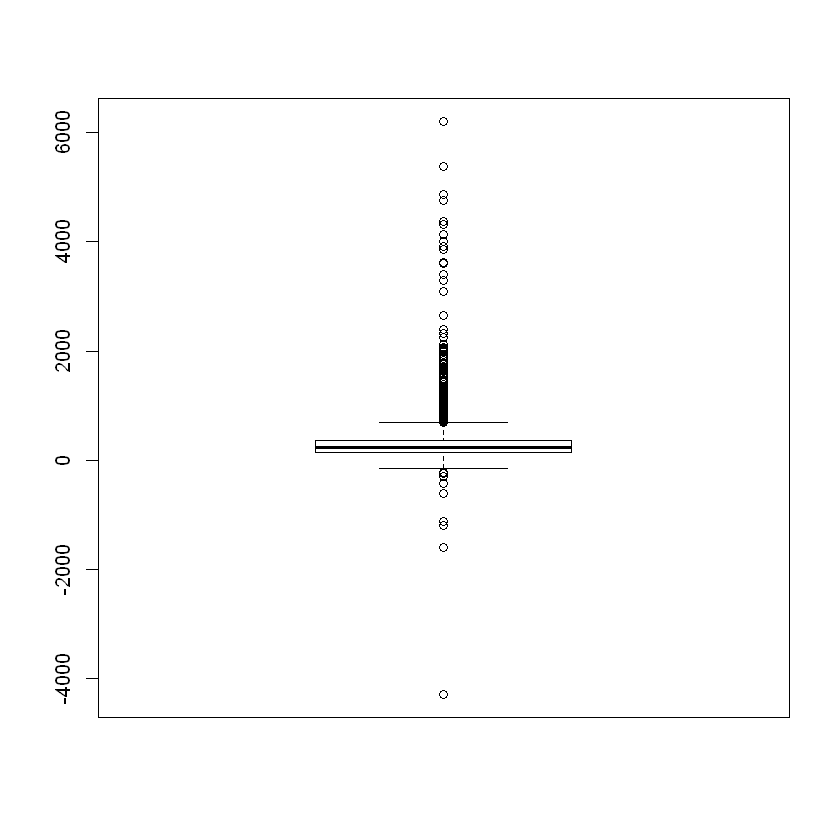

[,1]
[1,]    1
[2,]    1
[3,]    3
[4,]    5
[5,]   11
attr(,"class")
        1 
"integer"

,Recency,Frequency,Monetary
12346,10.8,2,0.0000
12347,12.2,7,615.7143
12348,11.9,4,449.3100


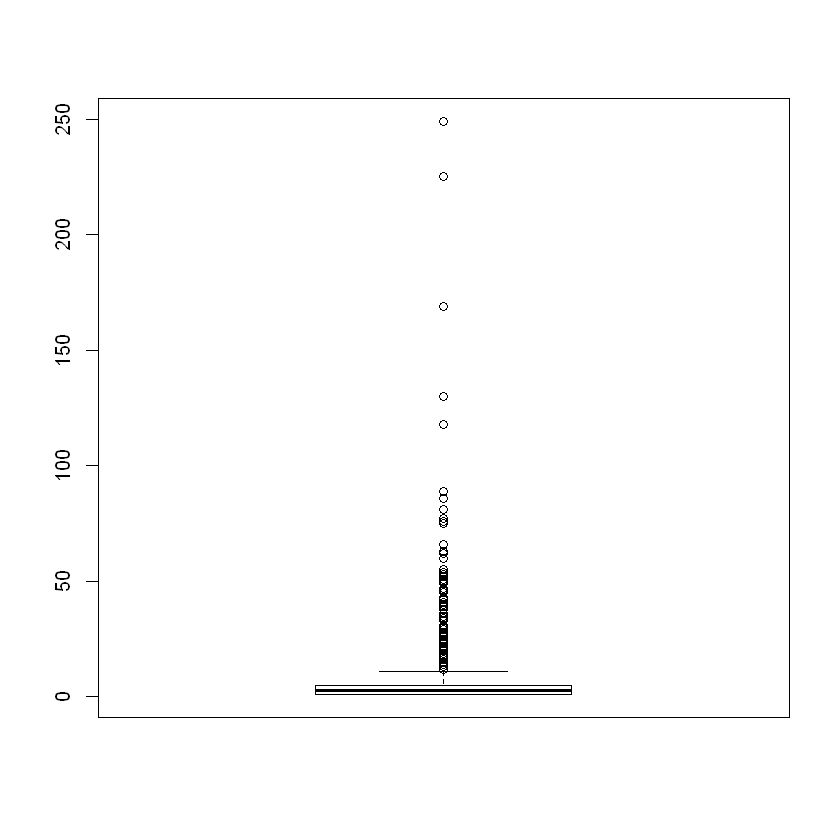

In [12]:
# NORMALIZING DATA
# 2.8.1 Delete Outlier
sort(RFM_data$Monetary, decreasing = T)
sort(RFM_data$Frequency, decreasing = T)

boxplot(RFM_data$Monetary)$stats
boxplot(RFM_data$Frequency)$stats

RFM_data$Monetary <- ifelse(RFM_data$Monetary >  761.3750, NA, RFM_data$Monetary)
RFM_data$Frequency <- ifelse(RFM_data$Frequency > 11, NA, RFM_data$Frequency)
RFM_data <- na.omit(RFM_data)

# 2.8.2 Normalization
dataResult <- data.frame(RFM_data[,c(2,3,4)], row.names = RFM_data$CustomerID)
head(dataResult, 3)
dataResult <- scale(dataResult)

[1]  630  598  469  936 1142

,Recency,Frequency,Monetary,clus
12346,0.9310688,-0.4873486,-1.428420,5
12347,1.2890758,1.4861987,2.020989,1
12348,1.2123601,0.3020704,1.088744,1


,k.cluster
12346,5
12347,1
12348,1


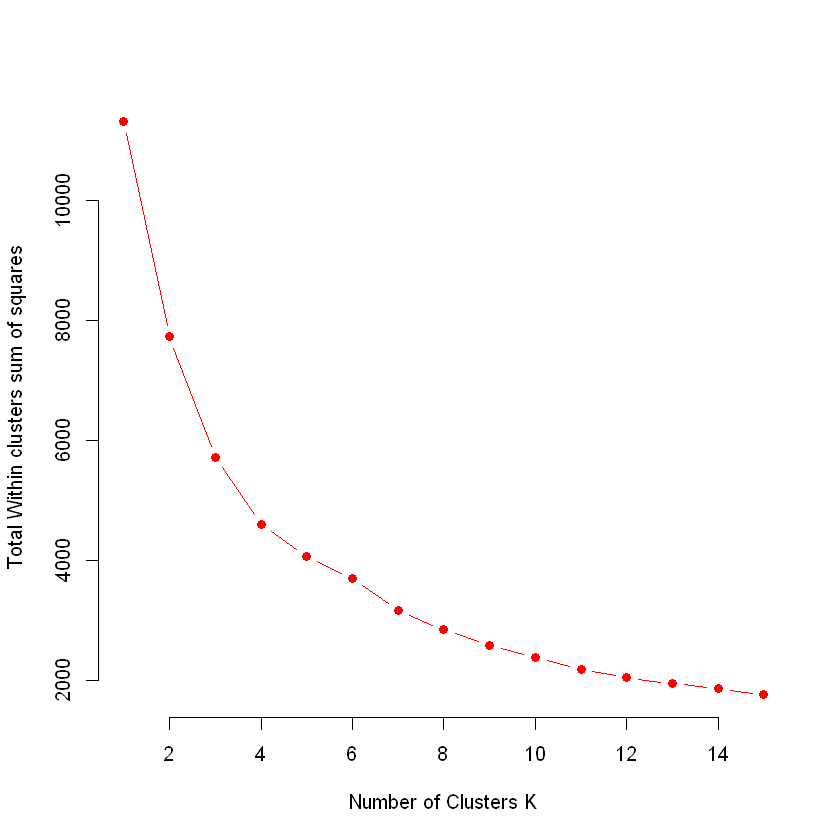

In [13]:
## K-MEANS CLUSTERING
# 3.1 K-Means
set.seed(6024)
k.max <- 15
wss <- sapply(1:k.max, function(k){kmeans(dataResult, k, nstart = 50, iter.max = 15)$tot.withinss})
plot(1:k.max, wss, type = 'b', pch = 19, frame=F, col = 'red', xlab = "Number of Clusters K", ylab = "Total Within clusters sum of squares")

set.seed(6024)
k = kmeans(dataResult, 5)
k$size #number of member of each cluster

dataCluster <- data.frame(dataResult)
dataCluster$clus <- k$cluster
head(dataCluster, 3)
clusters <- data.frame(k$cluster)
head(clusters,3)

In [16]:
## K-Means Plotting in 3D Graph
colors <- c('red', 'blue', 'yellow', 'orange', 'green')
colors <- colors[as.numeric(dataCluster$clus)]

package 'scatterplot3d' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\stis\AppData\Local\Temp\RtmpsLayQf\downloaded_packages


Warning message:
"package 'scatterplot3d' was built under R version 3.3.3"

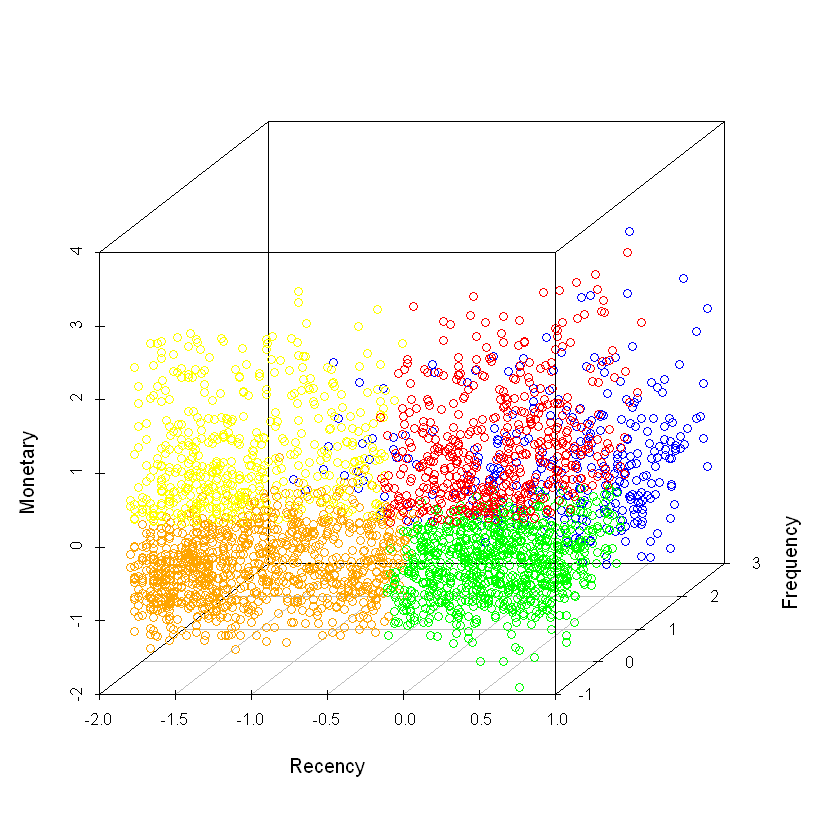

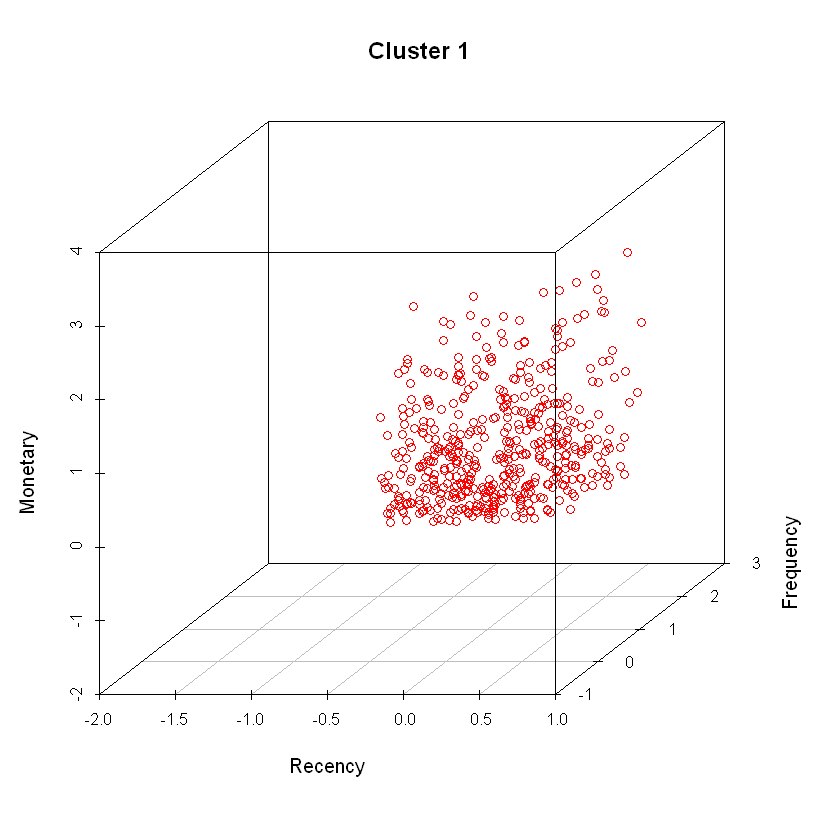

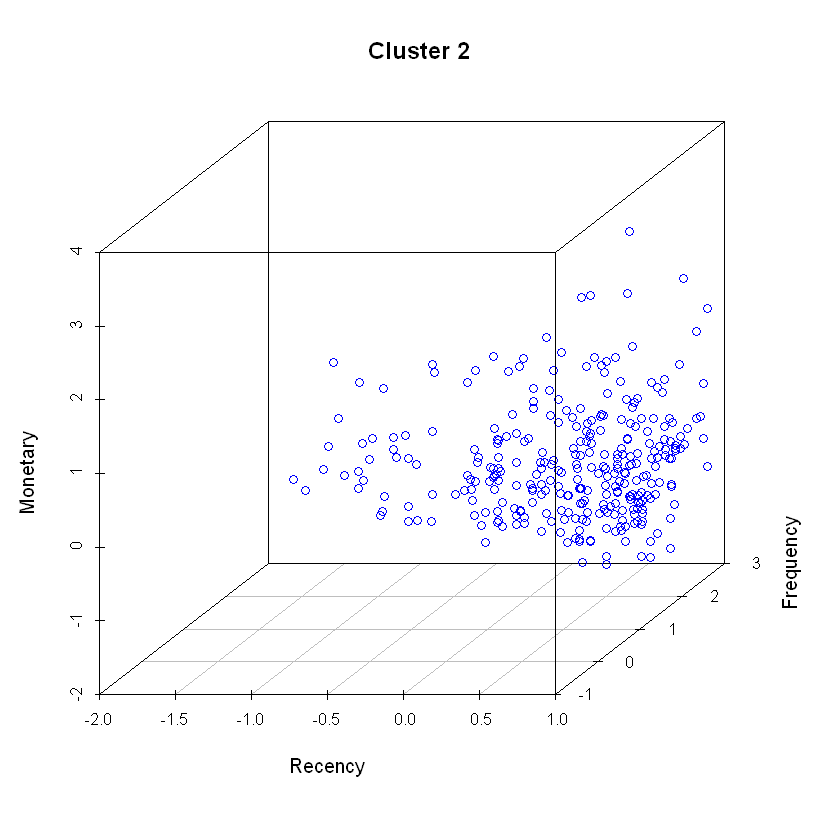

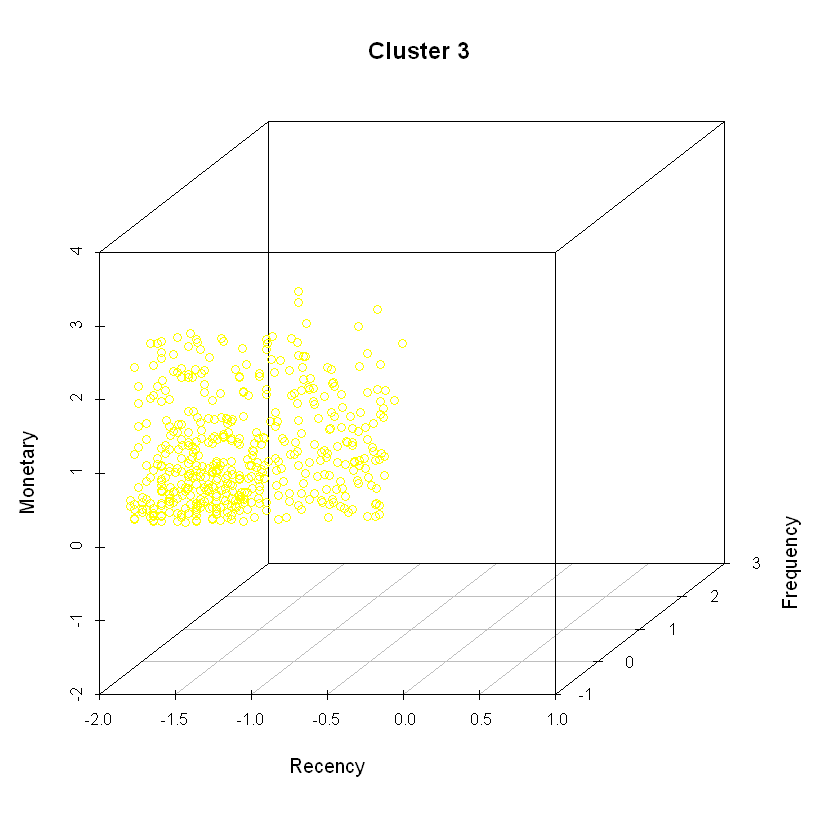

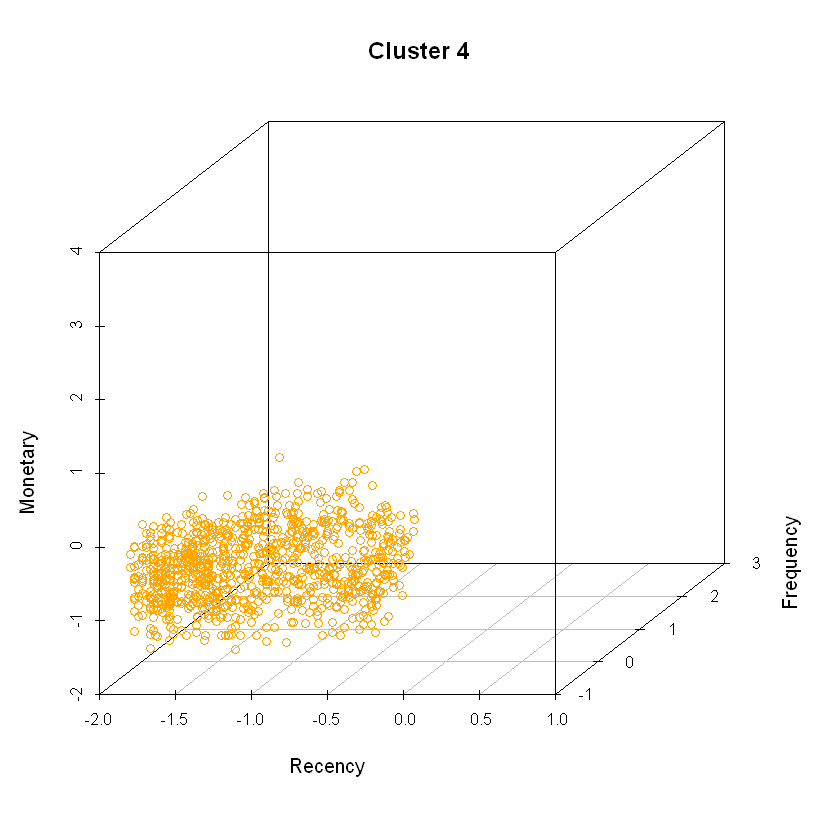

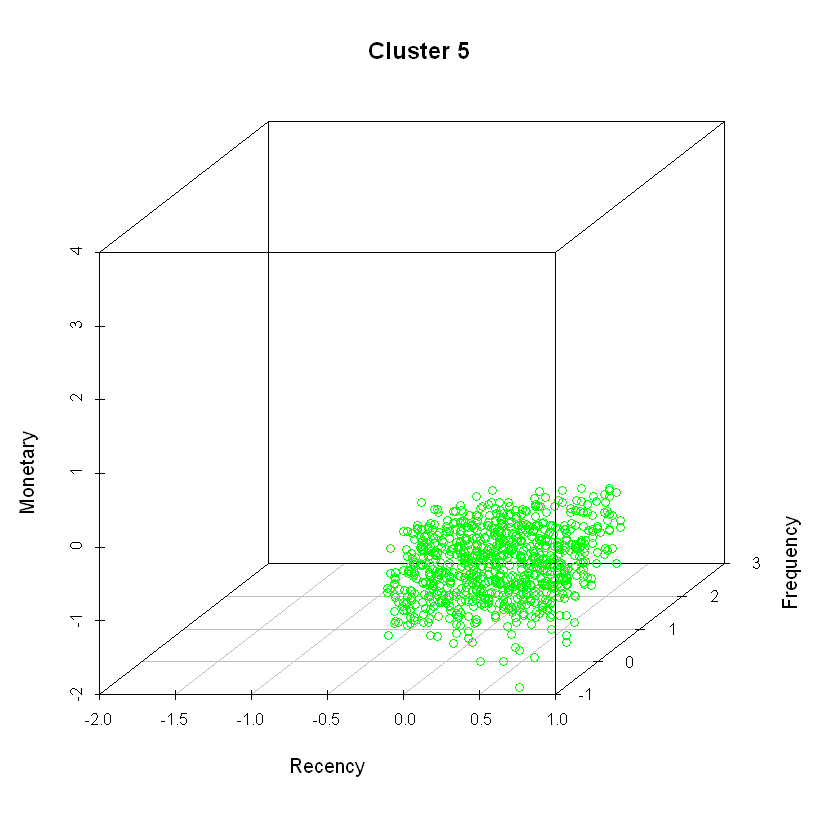

In [17]:
install.packages("scatterplot3d", dependencies=TRUE, repos="http://cran.us.r-project.org")
library(scatterplot3d)
scatterplot3d(dataCluster[, 1:3], xlim = -2:1.5, ylim = -1:3, zlim = -2:4, color = colors)
scatterplot3d(dataCluster[dataCluster$clus==1, 1:3], xlim = -2:1.5, ylim = -1:3, zlim = -2:4, color = "red", main = "Cluster 1" )
scatterplot3d(dataCluster[dataCluster$clus==2, 1:3], xlim = -2:1.5, ylim = -1:3, zlim = -2:4, color = "blue", main = "Cluster 2" )
scatterplot3d(dataCluster[dataCluster$clus==3, 1:3], xlim = -2:1.5, ylim = -1:3, zlim = -2:4, color = "yellow", main = "Cluster 3" )
scatterplot3d(dataCluster[dataCluster$clus==4, 1:3], xlim = -2:1.5, ylim = -1:3, zlim = -2:4, color = "orange", main = "Cluster 4" )
scatterplot3d(dataCluster[dataCluster$clus==5, 1:3], xlim = -2:1.5, ylim = -1:3, zlim = -2:4, color = "green", main = "Cluster 5" )